In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [45]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [46]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2


# VGSIX dataset

In [47]:
df = pd.read_csv("data_VGSIX.csv")

In [48]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-12,29.26,29.26,29.26,29.26,0,2019-04-12,28.9591,2019-04-12,64.5223,2019-04-12,0.0
1,1,2019-04-11,29.11,29.11,29.11,29.11,0,2019-04-11,28.9129,2019-04-11,61.7181,2019-04-11,0.0
2,2,2019-04-10,29.14,29.14,29.14,29.14,0,2019-04-10,28.8825,2019-04-10,62.6376,2019-04-10,0.0
3,3,2019-04-09,28.85,28.85,28.85,28.85,0,2019-04-09,28.8429,2019-04-09,56.8700,2019-04-09,0.0
4,4,2019-04-08,29.02,29.02,29.02,29.02,0,2019-04-08,28.8418,2019-04-08,62.0870,2019-04-08,0.0


In [49]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    29.26
1    29.11
2    29.14
3    28.85
4    29.02
Name: close, dtype: float64

In [50]:
len(close)

5340

In [51]:
train = close.loc[:len(close) -  int(len(close)*0.15)  -1]
test = close.loc[len(close) -  int(len(close)*0.15) :]
print(train.tail())
print(test.head())

4534    11.28
4535    11.40
4536    11.38
4537    11.28
4538    11.23
Name: close, dtype: float64
4539    11.32
4540    11.34
4541    11.17
4542    11.28
4543    11.34
Name: close, dtype: float64


Text(0,0.5,'1-day close price')

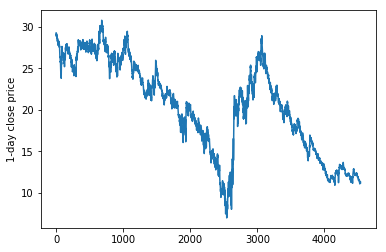

In [52]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price')

Text(0,0.5,'1-day close price')

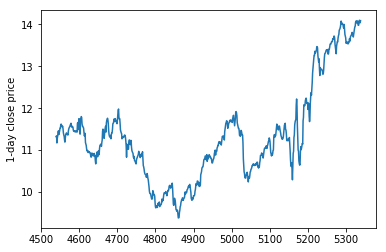

In [53]:
test.plot()
plt.ylabel('1-day close price')

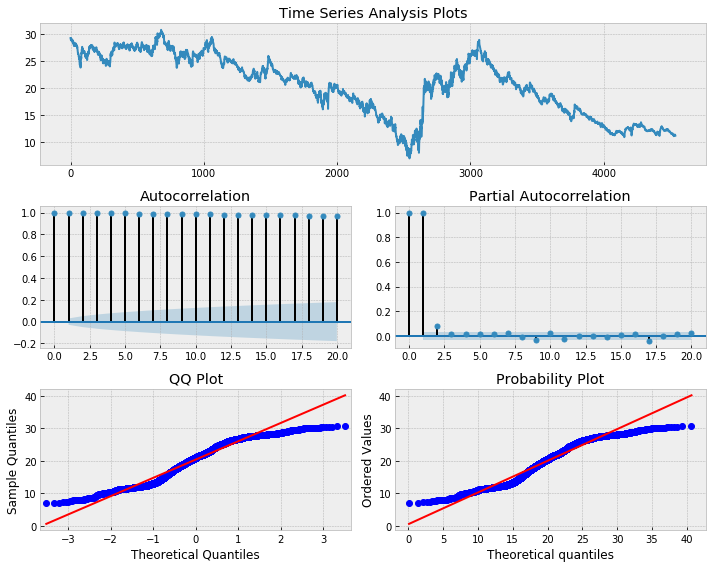

In [54]:
tsplot(train, lags=20)

Text(0,0.5,'Difference in 1-day close price')

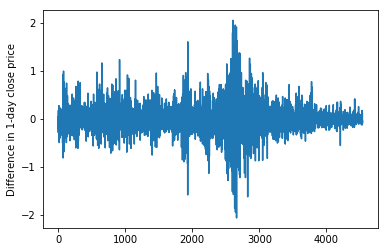

In [55]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [56]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-15.55809622651308,
 2.059121149551067e-28,
 20,
 4517,
 {'1%': -3.4317985322285707,
  '5%': -2.862180079546209,
  '10%': -2.567110717704876},
 1665.0084700079406)

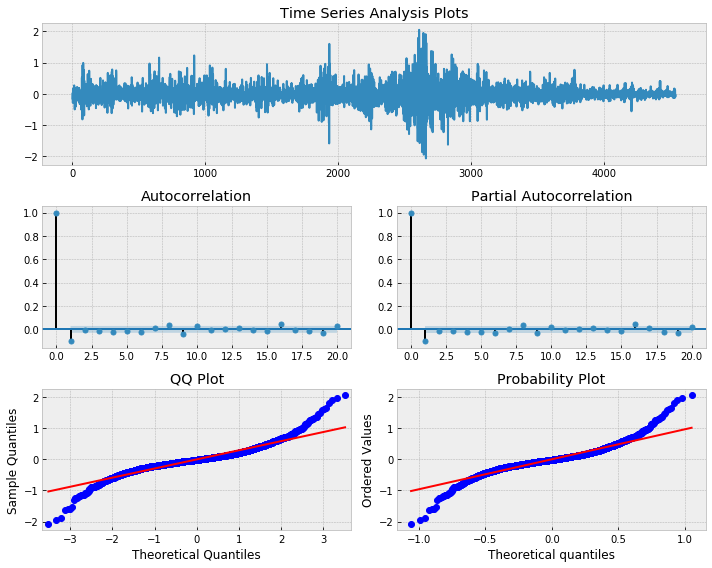

In [57]:
tsplot(train_diff, lags=20)

## Fit Model

In [58]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA
arima110_fit = arima110.fit()
arima110_fit.summary()

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4538
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -837.873
Method:                       css-mle   S.D. of innovations              0.291
Date:                Wed, 17 Apr 2019   AIC                           1681.746
Time:                        14:11:50   BIC                           1701.007
Sample:                             1   HQIC                          1688.530
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0040      0.004     -1.011      0.312      -0.012       0.004
ar.L1.D.close    -0.1007      0.015     -6.820      0.000      -0.130      -0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -9.9287           +0.0000j            9.9287            0.5000
-----------------------------------------------------------------------------
"""

In [59]:
arima210 = smt.ARIMA(train, (2,1,0)) #第一个AR， 第二个d，第三个MA
arima210_fit = arima210.fit()
arima210_fit.summary()

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4538
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -837.202
Method:                       css-mle   S.D. of innovations              0.291
Date:                Wed, 17 Apr 2019   AIC                           1682.404
Time:                        14:12:09   BIC                           1708.085
Sample:                             1   HQIC                          1691.449
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0040      0.004     -1.029      0.304      -0.012       0.004
ar.L1.D.close    -0.1025      0.015     -6.903      0.000      -0.132      -0.073
ar.L2.D.close    -0.0172      0.015     -1.158      0.247      -0.046       0.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.9798           -7.0207j            7.6269           -0.3139
AR.2           -2.9798           +7.0207j            7.6269            0.3139
-----------------------------------------------------------------------------
"""

### Analyze residuals

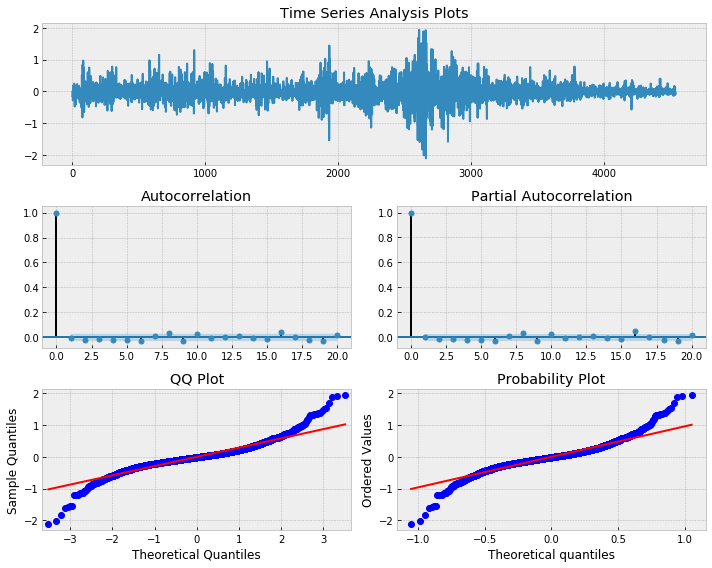

In [60]:
tsplot(arima110_fit.resid, lags=20)

### Test for remaining autocorrelation

In [61]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima110_fit.resid, lags=(5,)) # or 10 lags 
#第二个是p-value  p值大于5%,序列为白噪声

(array([7.4028852]), array([0.19235956]))

### Forecasting

In [62]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima110_fit.forecast(steps=num_steps)

In [63]:
arima110_fit.forecast(steps=num_steps)

(array([11.2306669 , 11.22623071, 11.22230849, 11.21833451, 11.21436574]),
 array([0.29103702, 0.3914104 , 0.4724995 , 0.54143525, 0.60254819]),
 array([[10.66024483, 11.80108898],
        [10.45908041, 11.993381  ],
        [10.29622649, 12.14839049],
        [10.15714091, 12.2795281 ],
        [10.03339297, 12.3953385 ]]))

In [64]:
arima110_fit.forecast(steps=num_steps)[0][4]

11.214365735950146

In [65]:
forecast_mean

array([11.2306669 , 11.22623071, 11.22230849, 11.21833451, 11.21436574])

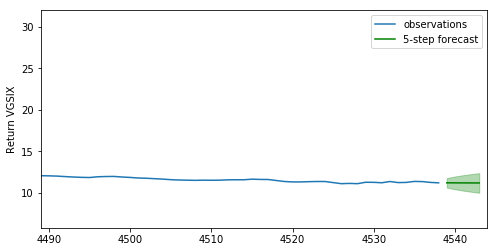

In [66]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return VGSIX')
plt.legend()

### calculate the performance metrics on test set

In [67]:
pred = []
for i in range( int(len(close)*0.15) ): 
    moving_train = close.loc[:len(close) -  int(len(close)*0.15)  -5 + i]
    moving_arima110 = smt.ARIMA(moving_train, (1,1,0))  
    moving_arima110_fit = moving_arima110.fit()
    
    pred.append(moving_arima110_fit.forecast(steps=5)[0][4])

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

801

In [68]:
len(test)

801

In [69]:
pred[-5:]

[14.028952001270662,
 14.062062962671064,
 14.010671256731218,
 13.968903038326431,
 13.965440757751342]

In [70]:
test.tail()

5335    14.05
5336    14.10
5337    14.07
5338    14.04
5339    14.09
Name: close, dtype: float64

In [73]:
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9992378885583452
MAE = 0.18102896380010916
RMSE = 0.25147529875079855
Scaled MAE = 0.038353594025446865
Scaled RMSE = 0.05327866498957597
